In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from skimage.feature import hog
import cv2, os, glob, math

In [2]:
def create_data(filename, px):
    data = []
    for jpg in glob.glob("images/" + filename + "/*.jpg"):
        img = np.array(mpimg.imread(jpg))
        img = cv2.resize(img, (px, px))
        fd = hog(img)
        data.append(fd)
        
    return data

def data_split(rate, array):
    l = len(array)
    n_train = math.floor((1-rate) * l)
    train = array[:n_train]
    test = array[n_train:]
    
    return train, test

def create_label(array, label1, label2):
    l = len(array)
    new_array = []
    for i in range(l):
        if i < l/2:
            new_array.append(label1)
        else:
            new_array.append(label2)
    
    return new_array

In [3]:
data_tigers = create_data("tigers", 64)[:500]
data_dolphins = create_data("dolphins", 64)[:500]

In [90]:
train_tigers, test_tigers = data_split(0.1, data_tigers)
train_dolphins, test_dolphins = data_split(0.1, data_dolphins)
X_train = [*train_tigers, *train_dolphins]
X_test = [*test_tigers, *test_dolphins]
y_train = create_label(X_train, 0, 1)
y_test = create_label(X_test, 0, 1)

In [91]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [115]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class NN():
    def __init__(self, lr = 0.001, iters = 1000):
        self.lr = lr
        self.iters = iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
            
        for i in range(self.iters): 
            preds = sigmoid(np.dot(X, self.w) + self.b)
            
            self.w = self.w - self.lr * (1/n_features) * np.dot(X.T, (preds-y))
            self.b = self.b - self.lr * (1/n_features) * np.sum(preds-y)
            
    def predict(self, X):
        preds = sigmoid(np.dot(X, self.w) + self.b)
        y_pred = [1 if y <= 0.5 else 0 for y in preds]

        return y_pred
    
    def score(self, y_pred, y_test):
        return np.sum(y_pred == y_test) / len(y_test)

In [126]:
n_iters = [250, 500, 750, 1000, 1250, 1500, 1750, 2000]
acc = []

for n in n_iters:
    nn = NN(lr = 0.0001, iters = n)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    acc.append(nn.score(y_pred, y_test))

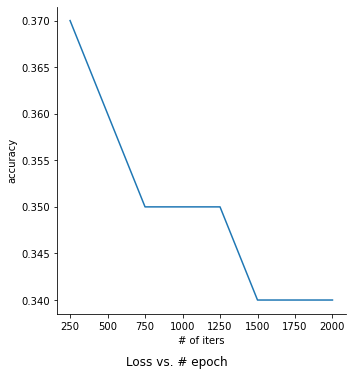

In [128]:
import seaborn as sns
g = sns.relplot(x = n_iters, y = acc, kind = 'line')
g.fig.suptitle('Loss vs. # epoch', y = 0)
g.set(xlabel = '# of iters', ylabel = 'accuracy')

In [129]:
lrs = [0.00001, 0.00005, 0.0001, 0.0002, 0.00025, 0.0005, 0.00075, 0.01]
acc = []

for lr in lrs:
    nn = NN(lr = lr, iters = 1000)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    acc.append(nn.score(y_pred, y_test))

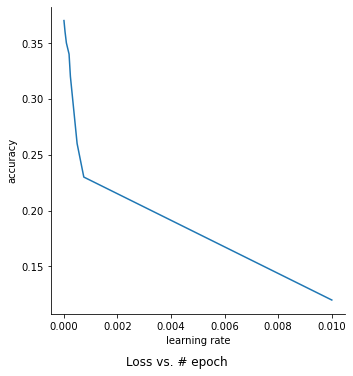

In [130]:
import seaborn as sns
g = sns.relplot(x = lrs, y = acc, kind = 'line')
g.fig.suptitle('Loss vs. # epoch', y = 0)
g.set(xlabel = 'learning rate', ylabel = 'accuracy')